In [ ]:
import tensorflow as tf
import keras
import matplotlib
import numpy as np

In [44]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import utils as np_utils
import matplotlib.pyplot as plt

In [45]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [46]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [47]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Text(0.5, 1.0, 'Class 5')

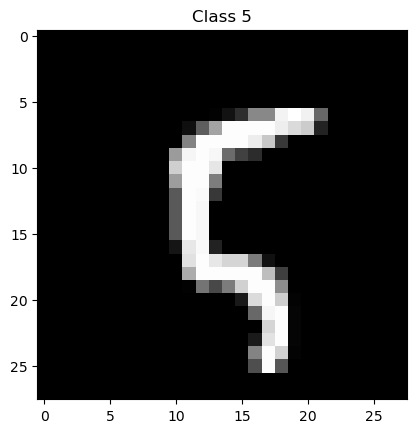

In [48]:
plt.imshow(X_train[100], cmap='gray')
plt.title('Class ' + str(y_train[100]))

In [49]:
X_train.shape

(60000, 28, 28)

In [50]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)

In [51]:
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [52]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [53]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [54]:
X_train /= 255
X_test /= 255

In [55]:
X_train.max(), X_train.min()

(1.0, 0.0)

In [56]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [57]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [58]:
neural_network = Sequential()

neural_network.add(InputLayer(input_shape=(28, 28, 1)))

neural_network.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
neural_network.add(BatchNormalization())
neural_network.add(MaxPooling2D(pool_size=(2, 2)))

neural_network.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
neural_network.add(BatchNormalization())
neural_network.add(MaxPooling2D(pool_size=(2, 2)))

neural_network.add(Flatten())

neural_network.add(Dense(128, activation='relu'))
neural_network.add(Dropout(0.2))
neural_network.add(Dense(128, activation='relu'))
neural_network.add(Dropout(0.2))

neural_network.add(Dense(10, activation='softmax'))

In [59]:
neural_network.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 11, 11, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,154 (508.41 KB)

 Trainable params: 130,026 (507.91 KB)

 Non-trainable params: 128 (512.00 B)

In [60]:
neural_network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [61]:
neural_network.fit(X_train, y_train, batch_size=128,
                   epochs=5, verbose=1, validation_data=(X_test, y_test))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 72s 129ms/step - accuracy: 0.8536 - loss: 0.4717 - val_accuracy: 0.9385 - val_loss: 0.1992
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 107ms/step - accuracy: 0.9803 - loss: 0.0646 - val_accuracy: 0.9872 - val_loss: 0.0443
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 100ms/step - accuracy: 0.9858 - loss: 0.0466 - val_accuracy: 0.9867 - val_loss: 0.0437
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 93ms/step - accuracy: 0.9885 - loss: 0.0373 - val_accuracy: 0.9888 - val_loss: 0.0353
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 90ms/step - accuracy: 0.9903 - loss: 0.0299 - val_accuracy: 0.9887 - val_loss: 0.0376


In [62]:
result = neural_network.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9858 - loss: 0.0504
